In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Agenda

1. Basic Data Preparation for Scikit-learn
2. How a Decision Tree Works
3. How a Random Forest Works
4. Basic Hyperparameter Tuning
5. Understanding Feature Importances
6. Identifying Correlated Features
7. Indepretting Your Model

In [99]:
def show_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [100]:
df_raw = pd.read_csv('data/train.csv')
df = df_raw.copy()
show_all(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
show_all(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Initial Processing

In [102]:
show_all(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [103]:
show_all(df.loc[:, df.dtypes=='object'].nunique()) #move down

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [104]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [105]:
x = (df.isnull().sum().sort_index()/len(df)).to_frame(name='perc_null')
x['types'] = df.dtypes
x[x.perc_null>0].sort_values('perc_null', ascending=False)

,perc_null,types
PoolQC,0.995205,object
MiscFeature,0.963014,object
Alley,0.937671,object
Fence,0.807534,object
FireplaceQu,0.472603,object
LotFrontage,0.177397,float64
GarageFinish,0.055479,object
GarageQual,0.055479,object
GarageType,0.055479,object
GarageYrBlt,0.055479,float64


Interesting: 
- LotFrontage has nulls but other Lot properties don't?

In [106]:
df.PoolQC.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)

def fill_nulls(col, filler=np.nanmedian):
    df[f'{col}_null'] = 0
    df[df[col].isnull()] = 1
    df[col].fillna(filler(df[col]), inplace=True)

fill_nulls('LotFrontage')
fill_nulls('GarageYrBlt')

In [107]:
#very nulls are not an actual word
for col in df.columns[df.dtypes=='object']:
    if df[col].isnull().any():
        df[col].fillna('null', inplace=True)

In [108]:
for col in df.columns[df.dtypes=='object']:
    df[col]=df[col].astype('category')

In [109]:
df.isnull().any().any()

False

In [110]:
for c in df_raw.columns[df_raw.dtypes=='object']:
    print(df_raw[c].value_counts())
    print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

In [111]:
from pandas.api.types import CategoricalDtype

#ExterQual, ExterCond
order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
cat_type = CategoricalDtype(categories=order, ordered=True)
df['ExterQual']=df['ExterQual'].astype(cat_type)
df['ExterCond']=df['ExterCond'].astype(cat_type)

In [112]:
print(df['ExterQual'].cat.codes[:5])
print(df['ExterQual'][:5])
df['ExterCond'].cat.ordered

0    3
1    2
2    3
3    2
4    3
dtype: int8
0    Gd
1    TA
2    Gd
3    TA
4    Gd
Name: ExterQual, dtype: category
Categories (5, object): [Po < Fa < TA < Gd < Ex]


True

### Recap:
1. Imported our data into a pandas Dataframe.
2. Dealt with null values by creating a null indicator then using a replacement value.
3. Turned categorical variables into the categorical dtype in Pandas.
4. Possibly some basic feature engineering

## Modeling

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

def rmse(x,y): 
    return np.sqrt(np.mean(((x-y)**2)))

def print_score(m):
    scores = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    
    for t, s in zip(['Train RMSE: ', 'Valid RMSE', 'Train R^2', 'Valid R^2'], scores):
        print(f'{t}: {s}')
        
    if hasattr(m, 'oob_score_'): 
        print(f'OOB Score: {m.oob_score_}')

In [142]:
df_y, df_x = df['SalePrice'], df.drop('SalePrice', axis=1) #same as axis='columns'
for col in df_x.columns[df_x.dtypes=='category']:
    df_x[col] = df_x[col].cat.codes

X_train, X_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [143]:
len(df_y)

1460

In [144]:
tree = DecisionTreeRegressor(min_samples_leaf=80)
tree.fit(X_train, y_train)
None

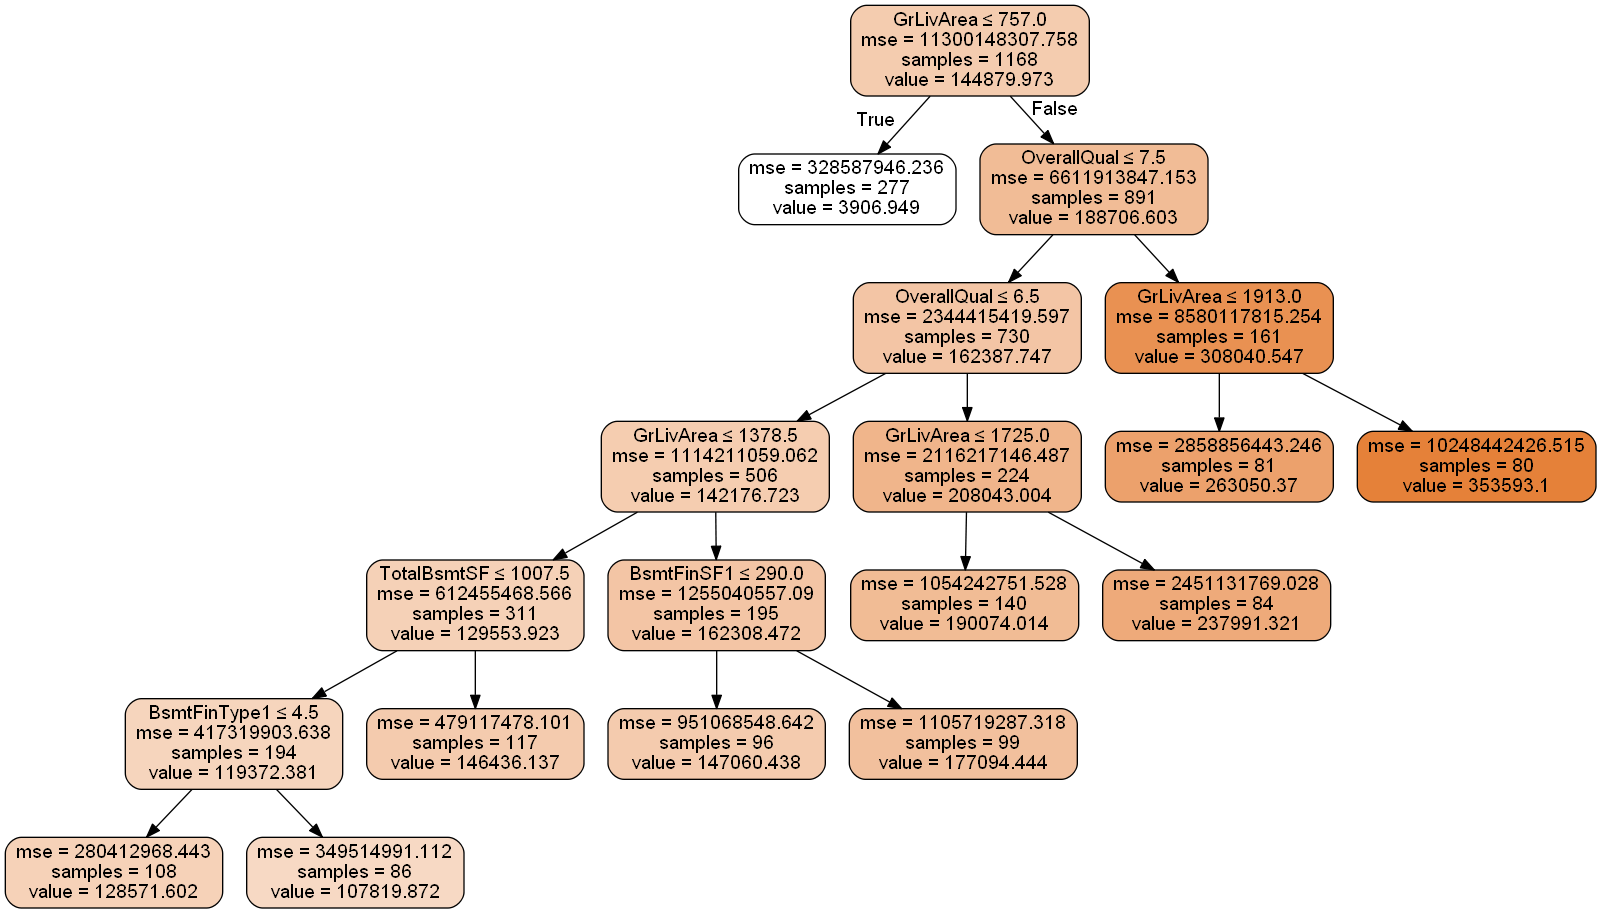

In [145]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
g = export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [119]:
model = RandomForestRegressor(n_estimators=30, 
                              n_jobs=-1,
                              oob_score=True)
model.fit(X_train, y_train)
print_score(model)

Train RMSE: : 10234.894862488185
Valid RMSE: 25361.89458669567
Train R^2: 0.9907299382279547
Valid R^2: 0.9457542097425155
OOB Score: 0.9230998575399606


In [146]:
model = RandomForestRegressor(n_estimators=30, 
                              n_jobs=-1,
                              oob_score=True,
                              min_samples_leaf=3,
                             max_features=0.5)
model.fit(X_train, y_train)
print_score(model)

Train RMSE: : 15561.26507679576
Valid RMSE: 31265.45946702662
Train R^2: 0.9785708148074427
Valid R^2: 0.9175610816766395
OOB Score: 0.9238116013398644


In [121]:
model2 = ExtraTreesRegressor(n_estimators=30, 
                              n_jobs=-1,
                              oob_score=True,
                             bootstrap=True,
                            min_samples_leaf=1,
                             max_features=0.5)
model2.fit(X_train, y_train)
print_score(model2)

Train RMSE: : 11530.274344428095
Valid RMSE: 29831.469987099623
Train R^2: 0.9882349131323784
Valid R^2: 0.9249497811736679
OOB Score: 0.9173877241849725


## Feature Importances

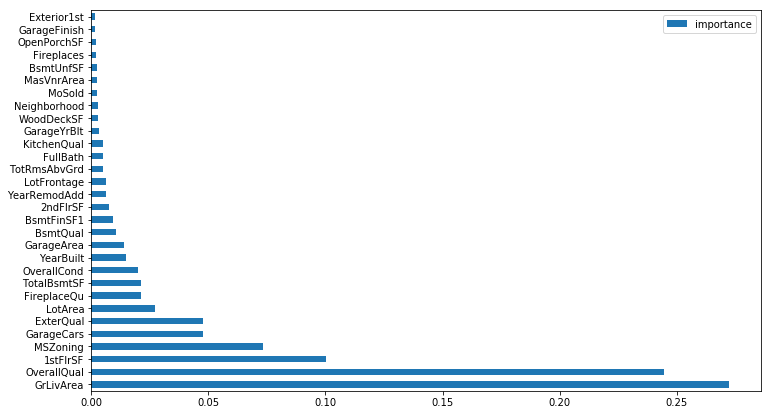

In [147]:
fi = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
fi[:30].plot.barh(figsize=(12, 7))

In [123]:
fi.loc['YearRemodAdd']

importance    0.003467
Name: YearRemodAdd, dtype: float64

In [124]:
X_train_old, X_valid_old = X_train.copy(), X_valid.copy()
X_train, X_valid = X_train[fi[fi['importance'] > 0.005].index], X_valid[fi[fi['importance'] > 0.005].index]

In [125]:
X_train.shape

(1168, 18)

In [126]:
model.fit(X_train, y_train)
print_score(model)

Train RMSE: : 18227.174355218976
Valid RMSE: 27430.471046026363
Train R^2: 0.9705995110924812
Valid R^2: 0.9365445124596006
OOB Score: 0.9148096041074245


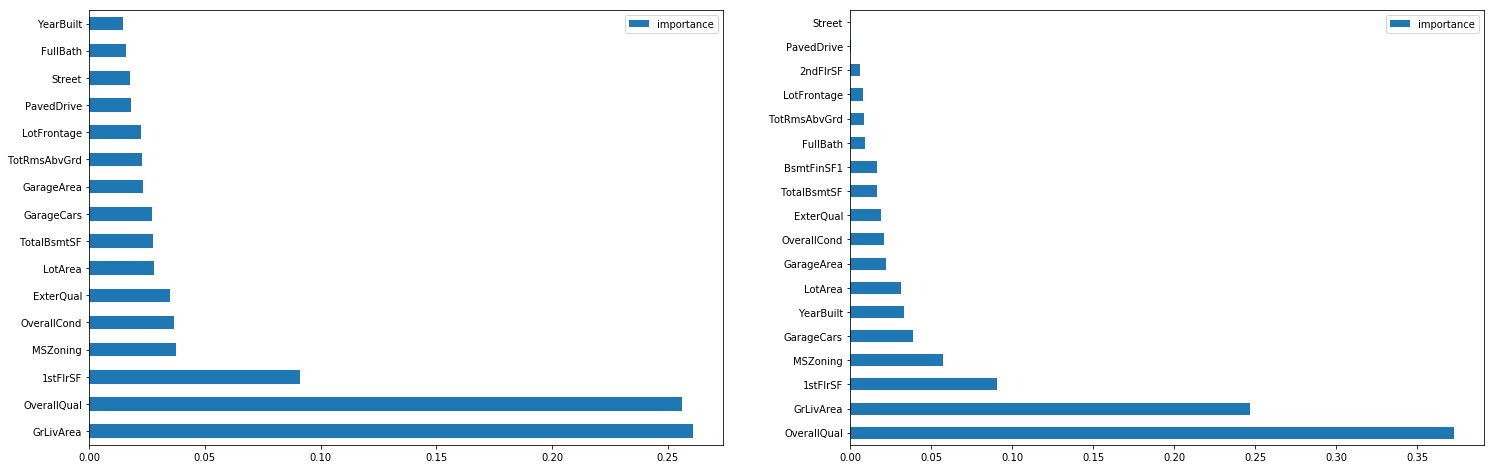

In [127]:
fi2 = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

fig, ax = plt.subplots(1,2, figsize=(25,8))
fi[:16].plot.barh(ax=ax[0])
fi2.plot.barh(ax=ax[1])

In [128]:
from scipy.cluster import hierarchy as hc
from scipy import stats

df2 = X_train[X_train.columns[X_train.dtypes != 'category']]

### Recap:
- identify important features, focus on those for feature engineering
- consolidate less important features
- try removing unimportant features, understand why the feature importances change the way they do
- be critical about which features are important and which are not: does this make sense? could there be a data issue? do we need more data?

## Identifying Correlated Features

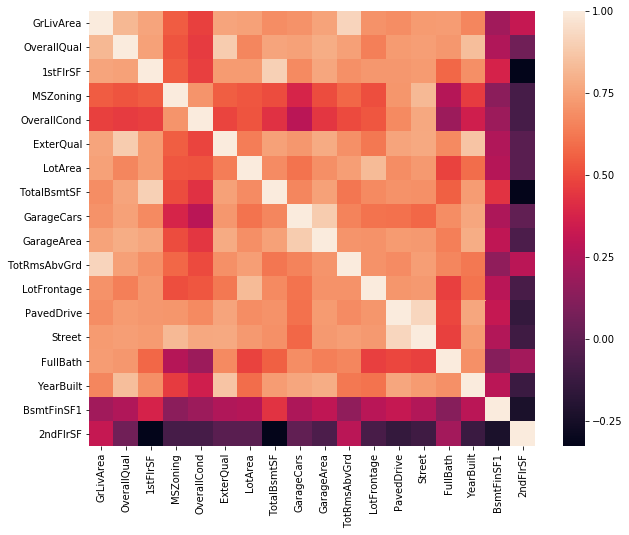

In [129]:
corr = np.round(stats.spearmanr(df2).correlation, 4)
fig, ax = plt.subplots(figsize=(10,8))
g = sns.heatmap(corr, ax=ax)
g.set_yticklabels(df2.columns, rotation=0)
g.set_xticklabels(df2.columns, rotation=90)
None

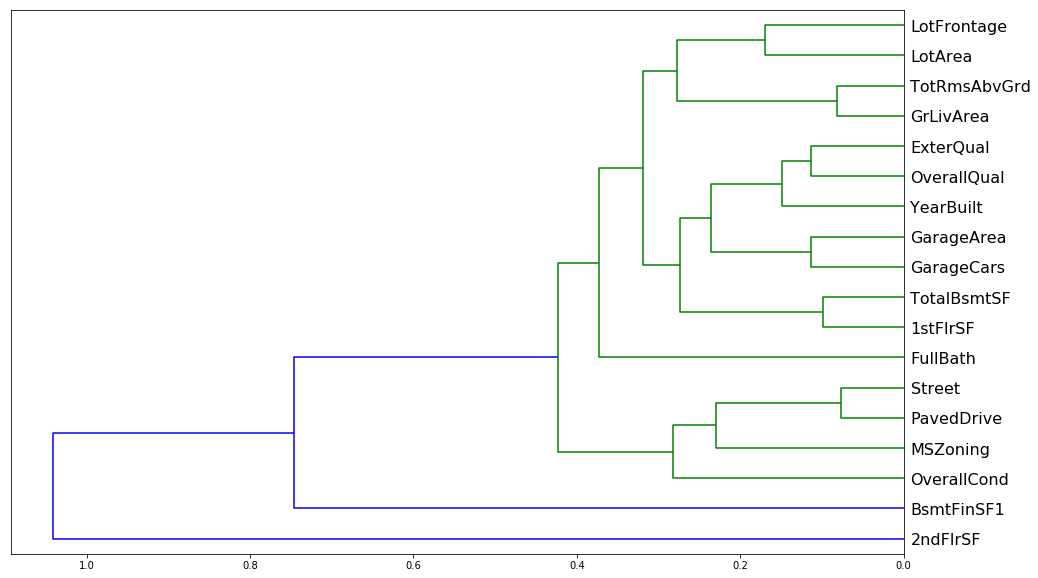

In [130]:
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df2.columns, orientation='left', leaf_font_size=16)
plt.show()

### Recap
- consolidate features that are correlated (or remove one)
- after each change, be sure to check how it affect model performance and feature importance
- understand why certain clusters exist

## Model Interpretation

In [131]:
preds = np.stack([t.predict(X_valid) for t in model.estimators_])

In [148]:
temp = X_valid.copy()
temp['pred_std'] = np.std(preds, axis=0)
temp['pred'] = np.mean(preds, axis=0)
temp['actual'] = y_valid
temp['rmse'] = np.sqrt((temp['pred'] - y_valid)**2)

In [149]:
mapper = df['Exterior1st'].cat.categories
temp['Exterior1st_name'] = X_valid['Exterior1st'].map(lambda x: mapper[x])
tempg = temp[['Exterior1st_name', 'actual',  'pred', 'pred_std', 'rmse']].groupby('Exterior1st_name').mean()
tempg

,actual,pred,pred_std,rmse
Exterior1st_name,,,,
1,1.000000,163.583965,183.248811,162.583965
AsbShng,116333.333333,122307.247804,16323.767604,9007.343467
BrkComm,82000.000000,95593.010974,31862.389200,13593.010974
BrkFace,156750.000000,157423.832501,24387.239386,25519.216440
CemntBd,241159.750000,244338.647745,46807.643131,19167.824455
HdBoard,162023.250000,158574.502092,18585.178705,13555.562634
MetalSd,155940.973684,153442.464880,19138.698186,15130.738756
Plywood,142714.363636,142992.380903,17266.761655,15920.095147
Stucco,146800.000000,133006.192196,17509.819410,17976.828175


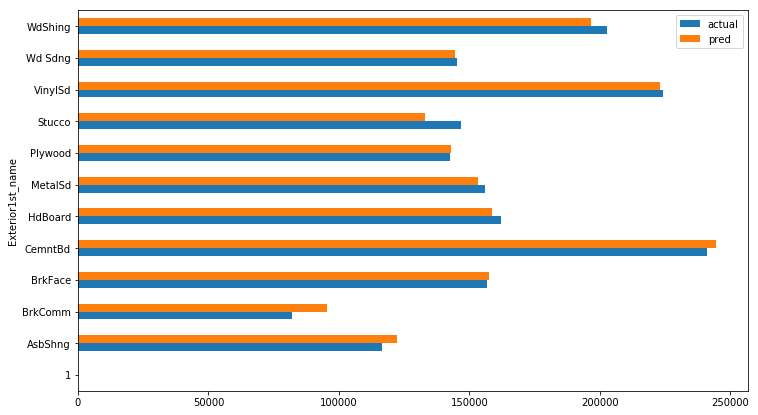

In [150]:
tempg[['actual', 'pred']].plot.barh(figsize=(12, 7))

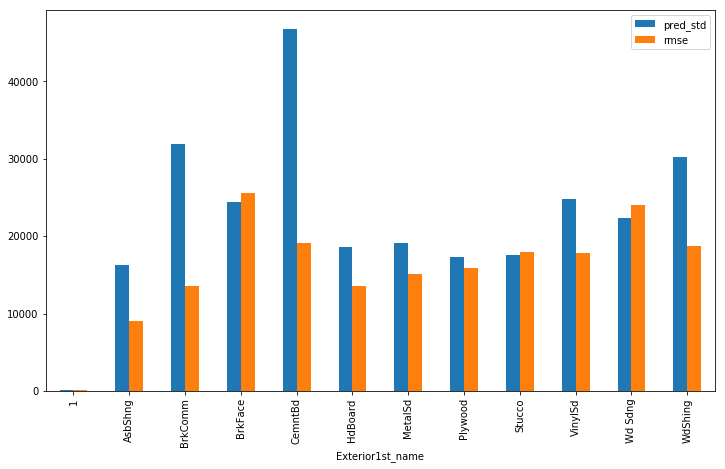

In [151]:
tempg[['pred_std', 'rmse']].plot.bar(figsize=(12, 7), secondary_y='square_error')

### Recap
- look into the actual vs predicted by category (for various features), look into what the model is doing poorly on
- look into the standard deviation vs error by category (for various features). Look into features that the model is confident about but doing poorly on, and vice versa.

## Partial Dependence Plots

In [152]:
from pdpbox import pdp

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(model, X_train, X_train.columns, feat)
    return pdp.pdp_plot(p, feat_name, 
                        plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1cca5c6fc18>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1cca590f2e8>})

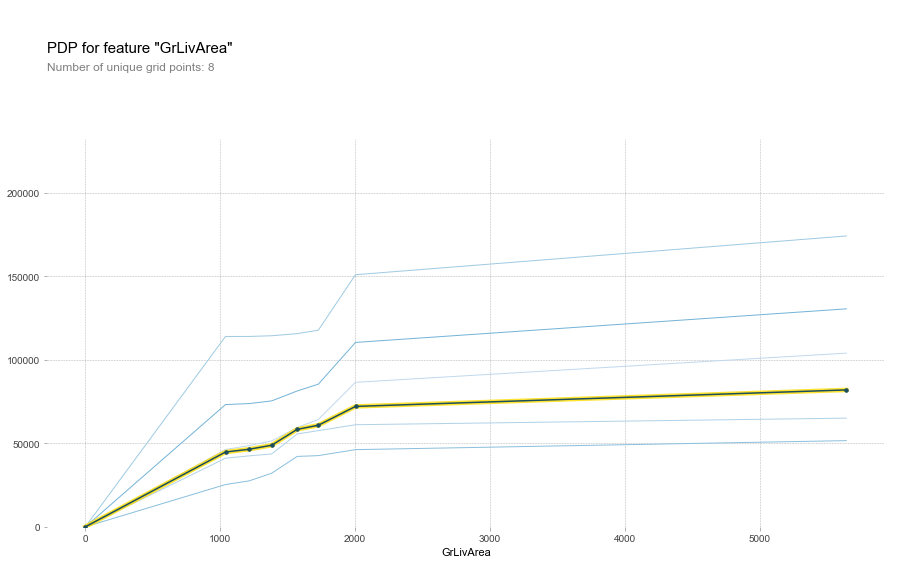

In [155]:
plot_pdp('GrLivArea', clusters=5)
#sns.regplot(data=df, x='GrLivArea', y='SalePrice')

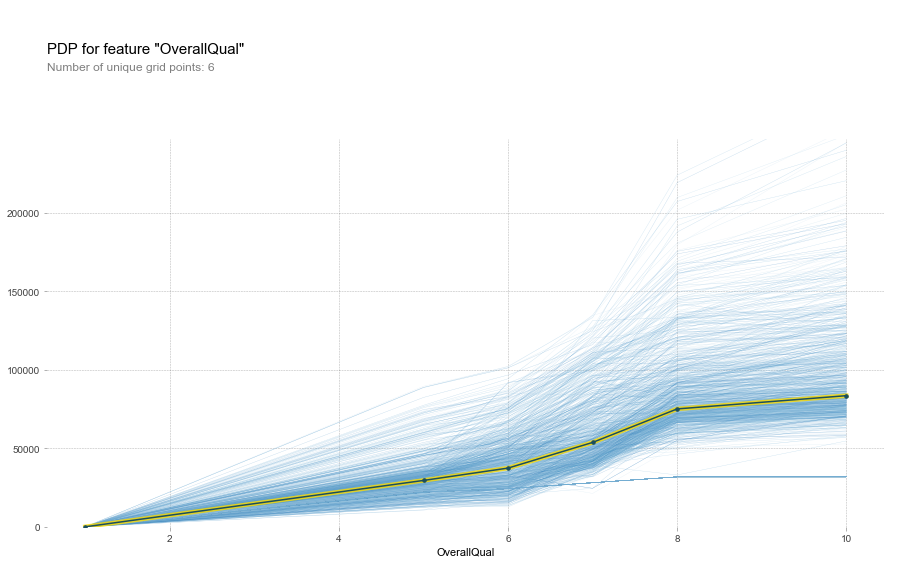

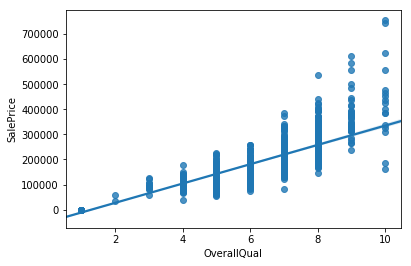

In [435]:
plot_pdp('OverallQual')
plt.figure()
sns.regplot(data=df, x='OverallQual', y='SalePrice')

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21984e41438>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2198301c198>})

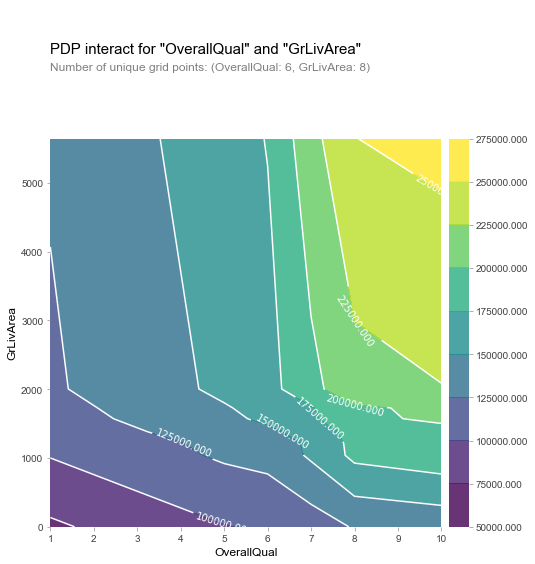

In [434]:
feats = ['OverallQual', 'GrLivArea']
p = pdp.pdp_interact(model, X_train, X_train.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x219838d9780>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x21984f94128>})

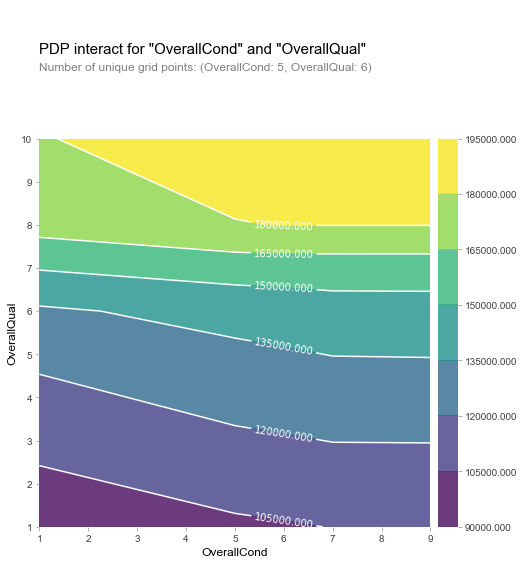

In [429]:
feats = ['OverallCond', 'OverallQual']
p = pdp.pdp_interact(model, X_train, X_train.columns, feats)
pdp.pdp_interact_plot(p, feats)

In [450]:
from treeinterpreter import treeinterpreter as ti

r = X_valid.values[None,0]; r

array([[1.7920e+03, 7.0000e+00, 9.6300e+02, 3.0000e+00, 2.0000e+00,
        7.0000e+00, 1.2435e+04, 1.2000e+01, 8.0000e+01, 5.0000e+00,
        2.0000e+00, 9.6300e+02, 2.0010e+03, 3.6100e+02, 5.6400e+02,
        3.0000e+00]])

In [452]:
prediction, bias, contributions = ti.predict(model, r)

In [455]:
idxs = np.argsort(contributions[0])
list(zip(X_valid.columns[idxs], X_valid.iloc[0][idxs], contributions[0][idxs]))

[('GarageCars', 2.0, -9082.146083735855),
 ('BsmtFinSF1', 361.0, -3727.207859312357),
 ('TotalBsmtSF', 963.0, -2971.5701668513775),
 ('1stFlrSF', 963.0, -2070.646160400114),
 ('BsmtQual', 3.0, -703.0049529519194),
 ('TotRmsAbvGrd', 7.0, -112.06671825014152),
 ('OverallCond', 5.0, 959.4567567080027),
 ('Street', 2.0, 1429.102165182904),
 ('Exterior1st', 12.0, 1803.780909682107),
 ('YearBuilt', 2001.0, 4347.224675947594),
 ('GarageArea', 564.0, 5117.419853996),
 ('LotArea', 12435.0, 7168.538098832799),
 ('LotFrontage', 80.0, 8370.298299032018),
 ('ExterQual', 3.0, 17676.53016565622),
 ('GrLivArea', 1792.0, 18490.670498693544),
 ('OverallQual', 7.0, 21708.5459875285)]

## Standard Process for Quick RF Development:

1.	Using scoring metric (provided or decided), create a scoring function (training + validation)
2.	Create validation set with same properties as test set
3.	Run a quick random forest on the data with minimal alterations
4.	Plot feature importance, look at curve and learn about those features (domain knowledge)
5.	Use natural breakpoint to remove unimportant features then plot again
6.	Now, look at data carefully and encode important things better
7.	Using heirachical clustering to remove redundant features (scipy)
8.	For interpretation, use partial dependence plots from PDP
9.	Tree Interpreter